<a href="https://colab.research.google.com/github/AmoghAN01/ML-DL-projects/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card data dimensionality reduction using Autoencoder 
##Overview
This project implements an autoencoder for dimensionality reduction on credit card default data. The autoencoder compresses the input features from 24 to 16 dimensions while preserving key information for default prediction.
##The Dataset
The project uses the "Default of Credit Card Clients" dataset from the UCI Machine Learning Repository. Key details:
Original shape: 30,001 rows, 25 columns
Processed shape: 30,000 rows, 24 features (X) and 1 target variable (Y)
Features include credit limit, gender, education, marital status, age, payment history, bill amounts, and payment amounts
##Methodology
###Data preprocessing:
Removed non-numeric values and scaled features using MinMaxScaler
###Autoencoder architecture:
Encoder: Input(24) -> Dense(64) -> Dense(32) -> Dense(16)
Decoder: Dense(32) -> Dense(64) -> Dense(24)
Activation: LeakyReLU and Sigmoid (output layer)
Dropout layers (0.2) for regularization
###Training:
Optimizer: Adam (learning rate: 0.0001)
Loss function: Mean Squared Error
Early stopping to prevent overfitting
200 epochs with batch size 256
##Results
Training Data:
MSE: 0.0011
R2 Score: 0.6597
Test Data:
MSE: 0.0011
R2 Score: 0.6579
Explained Variance Ratio: 5.6719
Dimensionality reduction: 24 features compressed to 16
The autoencoder successfully reduced the feature space while maintaining about 66% of the variance in the data. The similar performance on training and test sets indicates good generalization without overfitting.


In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl


In [4]:
# Importing libraries and stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Loading and preprocessing the data
def load_data(url):
    data = pd.read_excel(url)
    print("Dataset shape:", data.shape)
    print("\nColumn names:")
    print(data.columns)
    print("\nData types:")
    print(data.dtypes)
    print("\nFirst few rows:")
    print(data.head())


    data = data.iloc[1:].reset_index(drop=True)

    data = data.apply(pd.to_numeric, errors='coerce')

    data = data.dropna(axis=1, how='all')

    # Split into features (X) and target (y)
    X = data.iloc[:, :-1]  # Everything but the last column
    y = data.iloc[:, -1]   # Just the last column

    print("\nProcessed X shape:", X.shape)
    print("Processed y shape:", y.shape)

    return X, y

In [6]:
# Let's get that credit card data!
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
X, y = load_data(url)

Dataset shape: (30001, 25)

Column names:
Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Data types:
Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object

First few rows:
  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1    

In [7]:
# Splitting and scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Building the autoencoder

input_dim = X_train.shape[1]
encoding_dim = 16

# The encoder: squishing the data down
input_layer = Input(shape=(input_dim,))
encoder = Dense(64)(input_layer)
encoder = LeakyReLU()(encoder)
encoder = Dropout(0.2)(encoder)  # Dropout, because we don't want our model to be too clingy
encoder = Dense(32)(encoder)
encoder = LeakyReLU()(encoder)
encoder = Dense(encoding_dim)(encoder)

# The decoder: puffing it back up
decoder = Dense(32)(encoder)
decoder = LeakyReLU()(decoder)
decoder = Dropout(0.2)(decoder)
decoder = Dense(64)(decoder)
decoder = LeakyReLU()(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Putting it all together
autoencoder = Model(inputs=input_layer, outputs=decoder)
encoder_model = Model(inputs=input_layer, outputs=encoder)

In [11]:
# Compiling and training the model

autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Early stopping to deal with overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = autoencoder.fit(X_train, X_train,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          callbacks=[early_stopping])

Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1383 - val_loss: 0.1063
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0874 - val_loss: 0.0363
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343 - val_loss: 0.0245
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269 - val_loss: 0.0223
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245 - val_loss: 0.0201
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223 - val_loss: 0.0173
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 - val_loss: 0.0152
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177 - val_loss: 0.0140
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162 - val_loss: 0.0132
Epoch 10/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 11/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 - val_loss: 0.0122
Epoch 12/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

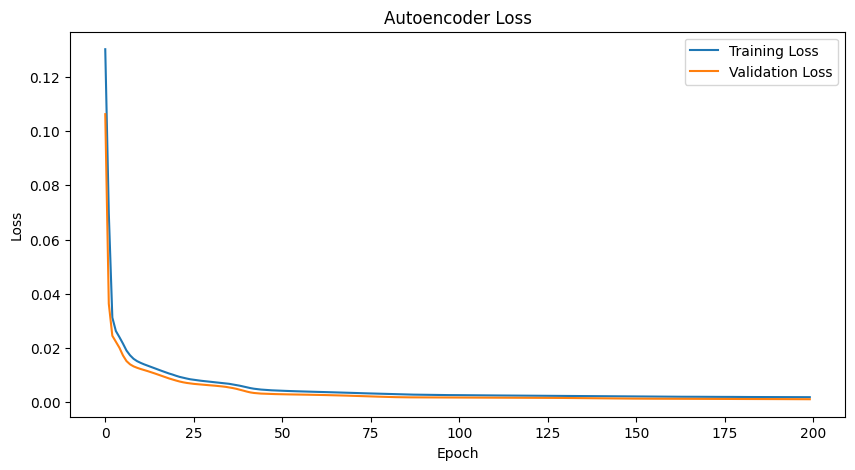

In [12]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Evaluating the model

reconstructed_train = autoencoder.predict(X_train)
reconstructed_test = autoencoder.predict(X_test)

print("Training Data Metrics:")
print(f"MSE: {mean_squared_error(X_train, reconstructed_train):.4f}")
print(f"R2 Score: {r2_score(X_train, reconstructed_train):.4f}")

print("\nTest Data Metrics:")
print(f"MSE: {mean_squared_error(X_test, reconstructed_test):.4f}")
print(f"R2 Score: {r2_score(X_test, reconstructed_test):.4f}")


encoded_train = encoder_model.predict(X_train)
evr = np.var(encoded_train) / np.var(X_train)
print(f"\nExplained Variance Ratio: {evr:.4f}")

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training Data Metrics:
MSE: 0.0011
R2 Score: 0.6597

Test Data Metrics:
MSE: 0.0011
R2 Score: 0.6579
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Explained Variance Ratio: 5.6719


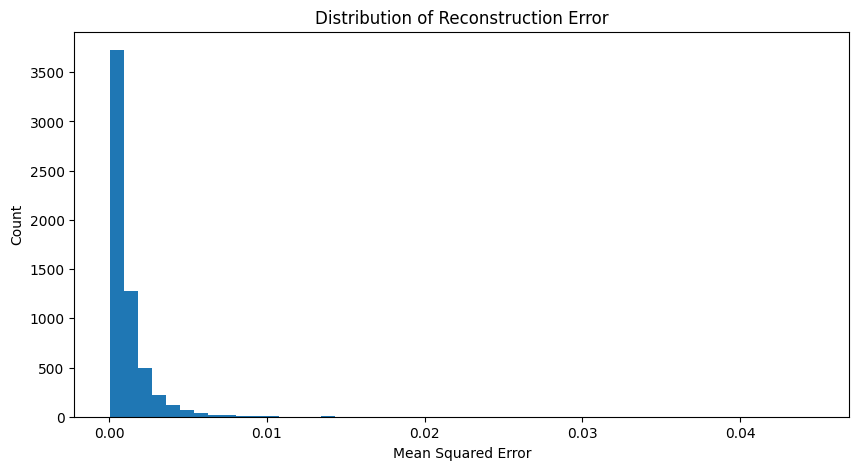

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


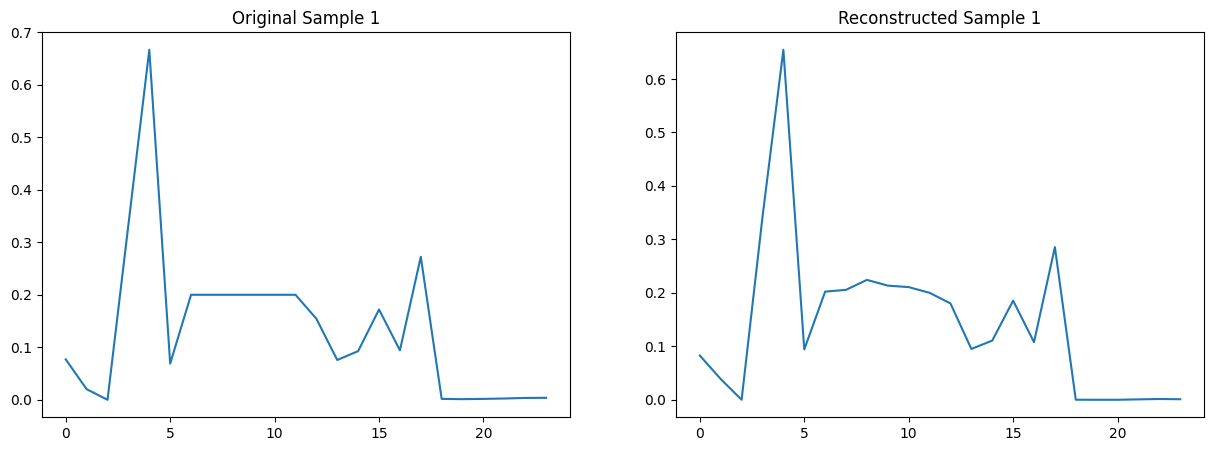

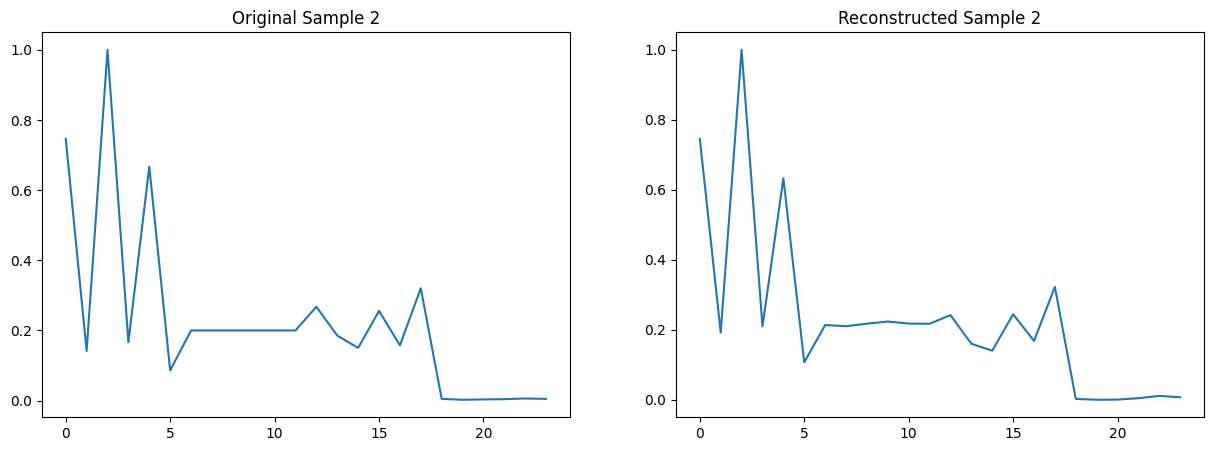

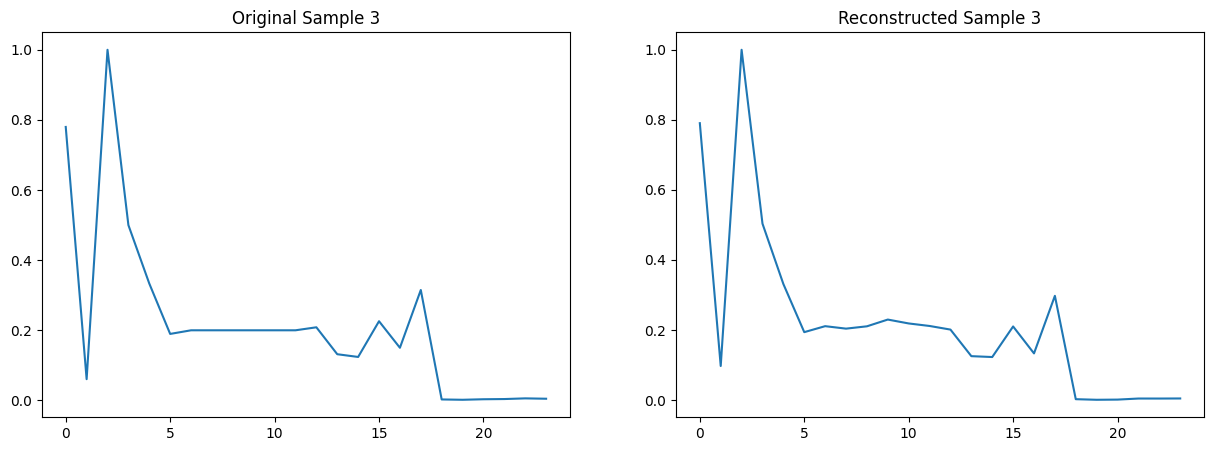

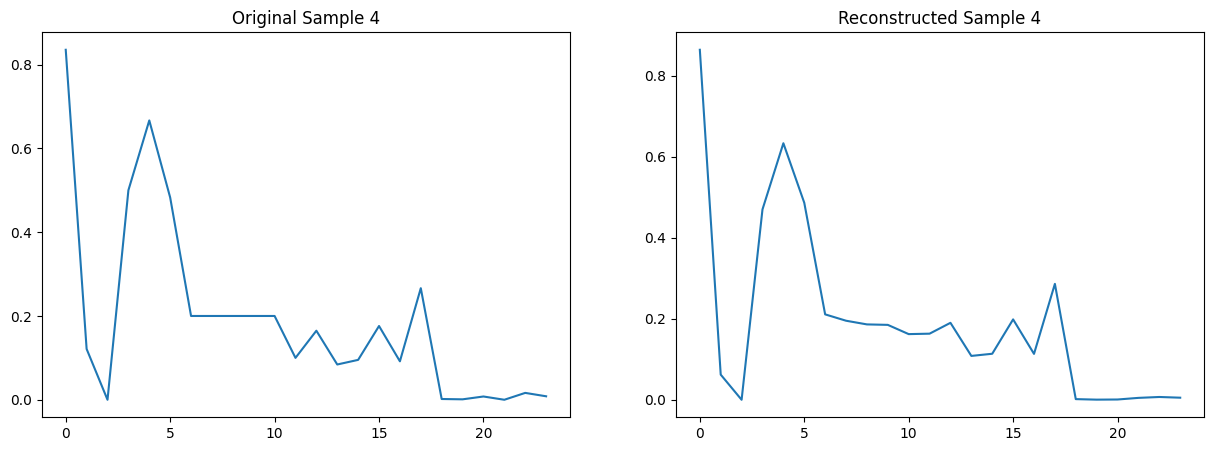

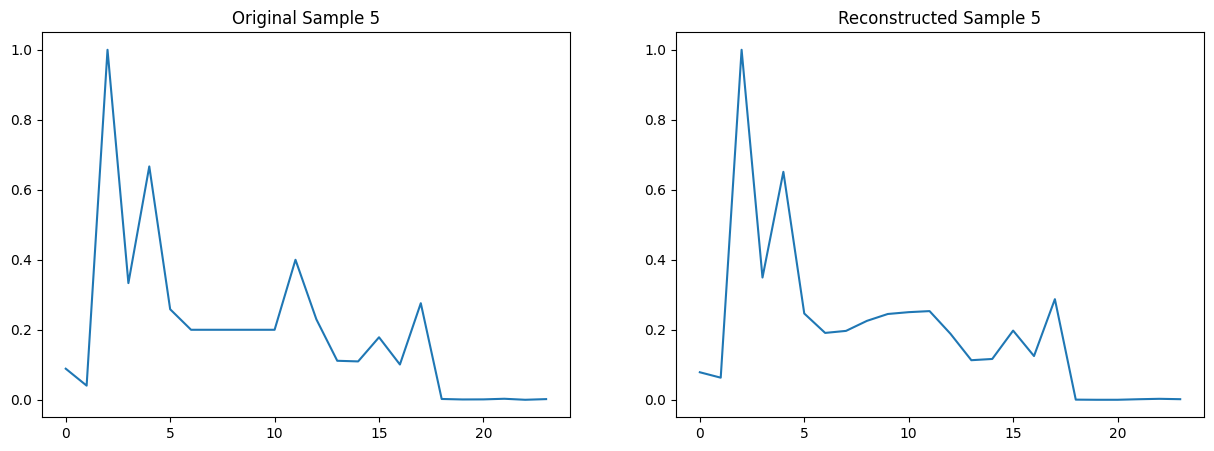

Original data shape: (24000, 24)
Encoded data shape: (24000, 16)


In [14]:
# Visualizing the results
error = np.mean(np.power(X_test - reconstructed_test, 2), axis=1)
plt.figure(figsize=(10, 5))
plt.hist(error, bins=50)
plt.xlabel('Mean Squared Error')
plt.ylabel('Count')
plt.title('Distribution of Reconstruction Error')
plt.show()

# Compare original vs reconstructed samples
n_samples = 5
original_samples = X_test[:n_samples]
reconstructed_samples = autoencoder.predict(original_samples)

for i in range(n_samples):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(original_samples[i])
    plt.title(f'Original Sample {i+1}')
    plt.subplot(1, 2, 2)
    plt.plot(reconstructed_samples[i])
    plt.title(f'Reconstructed Sample {i+1}')
    plt.show()

print(f"Original data shape: {X_train.shape}")
print(f"Encoded data shape: {encoded_train.shape}")